In [1]:
import pandas as pd
import urllib.request

data = pd.read_csv('../news/scraping_result/Coindesk 2020-4-6 2시 7분 45초 result.csv', error_bad_lines=False)

In [2]:
text = data[['main article']]

In [3]:
import nltk
text['main article'] = text.apply(lambda row: nltk.word_tokenize(row['main article']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
text['main article']

0      [The, price, of, bitcoin, has, hit, a, new, hi...
1      [The, price, of, bitcoin, surpassed, $, 2,000,...
2      [In, the, first, entry, in, CoinDesk, ’, s, “,...
3      [The, man, who, in, large, part, built, his, r...
4      [The, price, of, bitcoin, rose, above, $, 1,40...
                             ...                        
233    [Tom, Jessop, is, joining, the, firm, after, s...
234    [Designed, to, simplify, the, nostro-vostro, a...
235    [As, a, researcher, at, CERSA/CNRS, and, Harva...
236    [Called, Deloitte, Mercury, ,, and, revealed, ...
237    [Though, the, exact, amount, wasn, ’, t, discl...
Name: main article, Length: 238, dtype: object

In [5]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['main article']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
text['pos tag'][1]

[('The', 'DT'),
 ('price', 'NN'),
 ('of', 'IN'),
 ('bitcoin', 'NN'),
 ('surpassed', 'VBD'),
 ('$', '$'),
 ('2,000', 'CD'),
 ('for', 'IN'),
 ('the', 'DT'),
 ('first', 'JJ'),
 ('time', 'NN'),
 ('in', 'IN'),
 ('history', 'NN'),
 ('today', 'NN'),
 (',', ','),
 ('pushing', 'VBG'),
 ('the', 'DT'),
 ('cryptocurrency', 'NN'),
 ('to', 'TO'),
 ('a', 'DT'),
 ('fresh', 'JJ'),
 (',', ','),
 ('new', 'JJ'),
 ('record', 'NN'),
 ('amid', 'IN'),
 ('rising', 'VBG'),
 ('trader', 'NN'),
 ('interest.The', 'JJ'),
 ('currency', 'NN'),
 ('’', 'NNP'),
 ('s', 'NN'),
 ('price', 'NN'),
 ('rose', 'VBD'),
 ('as', 'RB'),
 ('much', 'JJ'),
 ('as', 'IN'),
 ('2.62', 'CD'),
 ('%', 'NN'),
 ('during', 'IN'),
 ('the', 'DT'),
 ('session', 'NN'),
 (',', ','),
 ('according', 'VBG'),
 ('to', 'TO'),
 ('CoinDesk', 'NNP'),
 ('’', 'NNP'),
 ('s', 'VBD'),
 ('Bitcoin', 'NNP'),
 ('Price', 'NNP'),
 ('Index', 'NNP'),
 ('(', '('),
 ('BPI', 'NNP'),
 (')', ')'),
 ('to', 'TO'),
 ('hit', 'VB'),
 ('a', 'DT'),
 ('press', 'NN'),
 ('time', 'NN'),


In [9]:
text['main article'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB','$',',','.')])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
len(text['main article'][0])

131

In [11]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['main article'] = text['main article'].apply(lambda x: [word.lower() for word in x if word not in (stop)])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
text['main article'][0]

['price',
 'bitcoin',
 'hit',
 'new',
 'high',
 'coindesk',
 'bitcoin',
 'price',
 'index',
 '(',
 'bpi',
 ')',
 'reaching',
 'average',
 'global',
 'exchanges.while',
 'string',
 'new',
 'all-time',
 'highs',
 'digital',
 'currency',
 'set',
 'notable',
 'means',
 'price',
 'striking',
 'distance',
 'figure',
 'find',
 'asset',
 'doubling',
 'value',
 'traded',
 'january',
 'edged',
 'increasing',
 'media',
 'exposure',
 'technology',
 'wider',
 'blockchain',
 'tech',
 'sector',
 'least',
 'exchanges',
 '–',
 'poloniex',
 'bitfinex',
 '–',
 'price',
 'hovering',
 '1,960.year-over-year',
 'price',
 'bitcoin',
 '%',
 'risen',
 'may',
 'press',
 'time',
 'bitcoin',
 '’',
 'market',
 'capitalization',
 '(',
 'value',
 'bitcoins',
 'existence',
 ')',
 'move',
 'comes',
 'broader',
 'boost',
 'cryptocurrency',
 'market',
 'broke',
 'barrier',
 'today.the',
 'increase',
 'taken',
 'place',
 'strong',
 'surges',
 'ripple',
 '’',
 'xrp',
 'seeks',
 'lower',
 'costs',
 'enterprise',
 'cross-bor

In [14]:
import csv
stopword_list =[]
f = open('../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['main article'] = text['main article'].apply(lambda x: [word for word in x if word not in stopword_list])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [15]:
import re
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['main article'] = text['main article'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [16]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
native_number_pattern=re.compile(r'[0-9]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
from nltk.stem import WordNetLemmatizer
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v').lower() for word in x])
print(text)

                                          main article  \
0    [price, bitcoin, hit, new, high, coindesk, bit...   
1    [price, bitcoin, surpass, first, time, history...   
2    [first, entry, coindesk, ’, “, bitcoin, milest...   
3    [man, large, part, build, reputation, base, co...   
4    [price, bitcoin, rise, today, set, new, press,...   
..                                                 ...   
233  [tom, jessop, join, firm, serve, goldman, ’, m...   
234  [design, simplify, nostro-vostro, account, ban...   
235  [researcher, cersa/cnrs, harvard, primavera, d...   
236  [call, deloitte, mercury, reveal, coindesk, ’,...   
237  [exact, amount, ’, disclose, axoni, say, bank,...   

                                               pos tag  
0    [(The, DT), (price, NN), (of, IN), (bitcoin, N...  
1    [(The, DT), (price, NN), (of, IN), (bitcoin, N...  
2    [(In, IN), (the, DT), (first, JJ), (entry, NN)...  
3    [(The, DT), (man, NN), (who, WP), (in, IN), (l...  
4    [(The, DT), (

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
tokenized_doc = text['main article'].apply(lambda x: [word for word in x if len(word) > 3])
print(tokenized_doc)

0      [price, bitcoin, high, coindesk, bitcoin, pric...
1      [price, bitcoin, surpass, first, time, history...
2      [first, entry, coindesk, bitcoin, milestones, ...
3      [large, part, build, reputation, base, conside...
4      [price, bitcoin, rise, today, press, time, pri...
                             ...                        
233    [jessop, join, firm, serve, goldman, manage, d...
234    [design, simplify, nostro-vostro, account, ban...
235    [researcher, cersa/cnrs, harvard, primavera, f...
236    [call, deloitte, mercury, reveal, coindesk, co...
237    [exact, amount, disclose, axoni, bank, contrib...
Name: main article, Length: 238, dtype: object


In [20]:
article_contents = tokenized_doc.values.tolist()

In [21]:
sentences = article_contents

In [22]:
sentences

[['price',
  'bitcoin',
  'high',
  'coindesk',
  'bitcoin',
  'price',
  'index',
  'reach',
  'average',
  'global',
  'string',
  'highs',
  'digital',
  'currency',
  'notable',
  'mean',
  'price',
  'strike',
  'distance',
  'figure',
  'find',
  'asset',
  'double',
  'value',
  'trade',
  'january',
  'edge',
  'increase',
  'media',
  'exposure',
  'technology',
  'wider',
  'tech',
  'sector',
  'least',
  'exchange',
  'poloniex',
  'bitfinex',
  'price',
  'hover',
  'price',
  'bitcoin',
  'rise',
  'press',
  'time',
  'bitcoin',
  'market',
  'capitalization',
  'value',
  'existence',
  'move',
  'come',
  'broader',
  'boost',
  'market',
  'break',
  'barrier',
  'increase',
  'take',
  'place',
  'strong',
  'surge',
  'ripple',
  'seek',
  'lower',
  'cost',
  'enterprise',
  'cross-border',
  'payments',
  'ethereum',
  'token',
  'cryptographic',
  'asset',
  'power',
  'decentralize',
  'coindesk',
  'subsidiary',
  'digital',
  'currency',
  'group',
  'ownershi

In [23]:
from gensim.models import Word2Vec

In [24]:
model = Word2Vec(sentences, min_count=1)

In [25]:
model.wv.vocab.keys()

dict_keys(['price', 'bitcoin', 'high', 'coindesk', 'index', 'reach', 'average', 'global', 'string', 'highs', 'digital', 'currency', 'notable', 'mean', 'strike', 'distance', 'figure', 'find', 'asset', 'double', 'value', 'trade', 'january', 'edge', 'increase', 'media', 'exposure', 'technology', 'wider', 'tech', 'sector', 'least', 'exchange', 'poloniex', 'bitfinex', 'hover', 'rise', 'press', 'time', 'market', 'capitalization', 'existence', 'move', 'come', 'broader', 'boost', 'break', 'barrier', 'take', 'place', 'strong', 'surge', 'ripple', 'seek', 'lower', 'cost', 'enterprise', 'cross-border', 'payments', 'ethereum', 'token', 'cryptographic', 'power', 'decentralize', 'subsidiary', 'group', 'ownership', 'stake', 'little', 'screw', 'image', 'shutterstock', 'surpass', 'first', 'history', 'today', 'push', 'fresh', 'record', 'trader', 'much', 'session', 'accord', 'year', 'annual', 'late', 'psychological', 'level', 'experience', 'significant', 'tailwinds', 'several', 'analysts', 'speak', 'co-fo

In [26]:
model['sharp']

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.0807616 ,  0.0728851 , -0.02515412,  0.06550308, -0.07874264,
        0.01263705, -0.00225115, -0.06525838,  0.02530796, -0.09022688,
       -0.05283608,  0.03214872, -0.01445092, -0.05380736,  0.02291538,
        0.04628067,  0.02757658, -0.0590196 , -0.02573089,  0.02199063,
        0.08292219, -0.00475351, -0.01085309, -0.0352681 , -0.01751583,
        0.00364018, -0.00860691, -0.01240193,  0.0715741 ,  0.01260904,
        0.04782719, -0.00671188, -0.01701307, -0.02981238, -0.04367632,
       -0.02489502, -0.01243283,  0.01294719, -0.08136369,  0.08406348,
       -0.00416743,  0.03827931,  0.00559593, -0.06458102,  0.066254  ,
        0.006642  , -0.06671733,  0.0242837 , -0.04801136, -0.00400898,
        0.04593503, -0.00464252,  0.05335208,  0.02239675, -0.01503905,
       -0.00569399, -0.08807984,  0.01467946,  0.05079676,  0.01335865,
        0.03280186, -0.00939583, -0.00531719,  0.00999367,  0.09418873,
       -0.04117992, -0.0767999 ,  0.04065416,  0.03189544,  0.01

In [27]:
len(list(model.wv.vocab))

7936

In [28]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [29]:
len(X)

7936

In [42]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=55)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
print(X)
print(assigned_clusters)

[[ 0.94709307  0.8868726  -0.35509148 ... -0.15403424 -0.06689997
  -1.024477  ]
 [ 1.3157232   1.2463046  -0.48467112 ... -0.2272264  -0.0847703
  -1.4297061 ]
 [ 0.48029014  0.4504122  -0.17857449 ... -0.08540997 -0.03036336
  -0.52170724]
 ...
 [ 0.01079651  0.0086287  -0.0081294  ...  0.00184995 -0.00266357
  -0.01128878]
 [ 0.01298808  0.00989203 -0.00530895 ... -0.00286262  0.00270365
  -0.00502178]
 [ 0.00302573  0.00368272 -0.00596044 ... -0.00160001  0.00386884
  -0.00207965]]
[0, 0, 1, 0, 3, 1, 2, 1, 3, 2, 0, 0, 2, 0, 3, 3, 2, 1, 1, 3, 0, 0, 2, 3, 0, 1, 3, 0, 2, 1, 2, 1, 0, 3, 2, 3, 1, 2, 0, 0, 3, 3, 0, 0, 2, 2, 2, 3, 0, 1, 1, 2, 1, 1, 2, 1, 2, 3, 1, 0, 0, 2, 1, 1, 2, 0, 1, 1, 2, 3, 0, 1, 2, 0, 1, 0, 1, 3, 1, 2, 1, 3, 0, 0, 3, 2, 3, 1, 1, 1, 3, 1, 2, 1, 1, 2, 0, 3, 0, 3, 3, 3, 3, 3, 0, 2, 3, 2, 0, 2, 3, 2, 0, 1, 2, 3, 3, 1, 0, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 0, 1, 1, 2, 2, 3, 2, 3, 1, 3, 0, 3, 2, 0, 2, 2, 2, 1, 2, 0, 3, 3, 1, 0, 1, 2, 2, 1, 1, 1, 3, 1, 0, 2, 1, 3, 3

In [43]:
import pandas as pd
import numpy as np
temp_heder = ['word','cluster']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [44]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [45]:
len(model.wv.vocab)

7936

In [46]:
temp_cluster_result['cluster'] = assigned_clusters

In [47]:
y_km = temp_cluster_result['cluster'].values

In [48]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

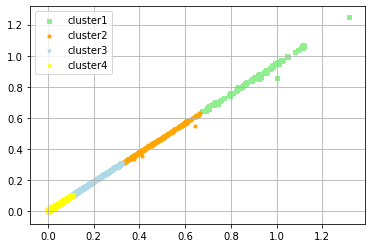

In [49]:

plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [50]:
temp_cluster_result[temp_cluster_result['cluster']==0].head(30) #암호화폐 시장, 기술

,word,cluster
0,price,0
1,bitcoin,0
3,coindesk,0
10,digital,0
11,currency,0
13,mean,0
20,value,0
21,trade,0
24,increase,0
27,technology,0


In [51]:
temp_cluster_result[temp_cluster_result['cluster']==1].head(30) # 암호화폐 가격

,word,cluster
2,high,1
5,reach,1
7,global,1
17,find,1
18,asset,1
25,media,1
29,tech,1
31,least,1
36,rise,1
49,place,1


In [408]:
temp_cluster_result[temp_cluster_result['cluster']==2].head(30) # 미래에 발명, 가정, 가설 

,word,cluster
6,average,2
8,string,2
9,highs,2
12,notable,2
16,figure,2
22,january,2
28,wider,2
30,sector,2
34,bitfinex,2
37,press,2


In [52]:
temp_cluster_result[temp_cluster_result['cluster']==3].head(30)  # 기술 

,word,cluster
4,index,3
8,string,3
14,strike,3
15,distance,3
19,double,3
23,edge,3
26,exposure,3
33,poloniex,3
35,hover,3
40,capitalization,3


In [53]:
temp_cluster_result[temp_cluster_result['cluster']==4].head(30) #부정적 이미지 좌절

,word,cluster


In [367]:
temp_cluster_result[temp_cluster_result['cluster']==5]  # 긍정, 완화 이미지 

,word,cluster


In [368]:
temp_cluster_result[temp_cluster_result['cluster']==6]  ## 사상, 이상 암호화폐 

,word,cluster


In [410]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 암호화폐 가격

103

In [411]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) #암호화폐 시장, 기술

272

In [412]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 미래에 발명, 가정, 가설 

828

In [413]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 기술 

6733

In [414]:
len(temp_cluster_result[temp_cluster_result['cluster']==4]) #부정적 이미지 좌절

0

In [374]:
len(temp_cluster_result[temp_cluster_result['cluster']==5])  # 긍정, 완화 이미지 

0

In [375]:
len(temp_cluster_result[temp_cluster_result['cluster']==6])  ## 사상, 이상 암호화폐 

0